# Analysing and predicting the type of service in An ATP tennis Match

In [ ]:
import pandas as pd
import numpy as np


In [21]:
data_set = pd.read_csv("events.csv")
data_set.head()

,Unnamed: 0,rallyid,frameid,strokeid,hitter,isserve,type,stroke,x_cabal,y_cabal,x_farah,y_farah,x_lopez,y_lopez,x_murray,y_murray,time
0,0,1,22266,1,Farah,True,points,forehand,7.18,19.16,3.76,27.19,9.29,1.56,3.62,3.86,0.00
1,1,1,22299,2,Lopez,False,topspin,backhand,7.37,18.57,4.01,25.34,9.58,2.33,3.65,3.86,1.32
2,2,1,22330,3,Cabal,False,volley,backhand,7.93,16.81,4.30,22.90,9.70,3.54,3.50,3.76,2.56
3,3,1,22396,4,Lopez,False,topspin,forehand,7.42,18.08,4.28,19.80,6.45,7.35,2.68,6.20,5.20
4,4,1,22433,5,Farah,False,volley,forehand,6.63,18.83,3.16,17.96,6.25,8.82,2.96,8.36,6.68


In [22]:
data_set.tail(n=3)

,Unnamed: 0,rallyid,frameid,strokeid,hitter,isserve,type,stroke,x_cabal,y_cabal,x_farah,y_farah,x_lopez,y_lopez,x_murray,y_murray,time
413,413,159,244032,2,Farah,False,lob,forehand,3.54,17.79,7.79,25.90,4.11,2.00,6.90,9.85,8870.64
414,414,160,245314,1,Lopez,True,points,forehand,2.04,27.62,6.92,18.45,6.77,0.46,3.63,9.20,8921.92
415,415,160,245348,2,Cabal,False,topspin,backhand,3.62,26.81,6.97,18.52,7.41,2.58,3.62,11.16,8923.28


In [23]:
data_set.info

<bound method DataFrame.info of      Unnamed: 0  rallyid  frameid  strokeid hitter  isserve     type  \
0             0        1    22266         1  Farah     True   points   
1             1        1    22299         2  Lopez    False  topspin   
2             2        1    22330         3  Cabal    False   volley   
3             3        1    22396         4  Lopez    False  topspin   
4             4        1    22433         5  Farah    False   volley   
..          ...      ...      ...       ...    ...      ...      ...   
411         411      158   243158         1  Lopez     True   points   
412         412      159   244003         1  Lopez     True   points   
413         413      159   244032         2  Farah    False      lob   
414         414      160   245314         1  Lopez     True   points   
415         415      160   245348         2  Cabal    False  topspin   

       stroke  x_cabal  y_cabal  x_farah  y_farah  x_lopez  y_lopez  x_murray  \
0    forehand     7.18

In [24]:
data_set.dtypes

Unnamed: 0      int64
rallyid         int64
frameid         int64
strokeid        int64
hitter         object
isserve          bool
type           object
stroke         object
x_cabal       float64
y_cabal       float64
x_farah       float64
y_farah       float64
x_lopez       float64
y_lopez       float64
x_murray      float64
y_murray      float64
time          float64
dtype: object

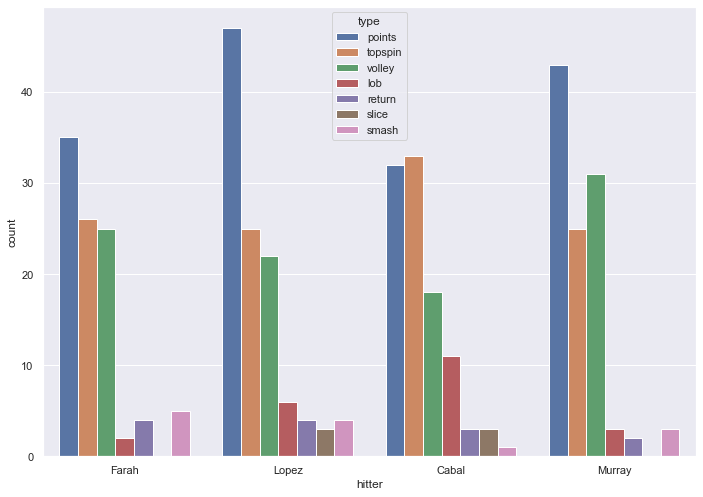

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
# set the background colour of the plot to white
sns.set(style="whitegrid", color_codes=True)
# setting the plot size for all plots
sns.set(rc={'figure.figsize':(11.7,8.27)})
# create a countplot
sns.countplot('hitter',data=data_set,hue = 'type')
# Remove the top and down margin
# sns.despine(offset=10, trim=True)
sns.set(rc={'figure.figsize':(16.7,13.27)})

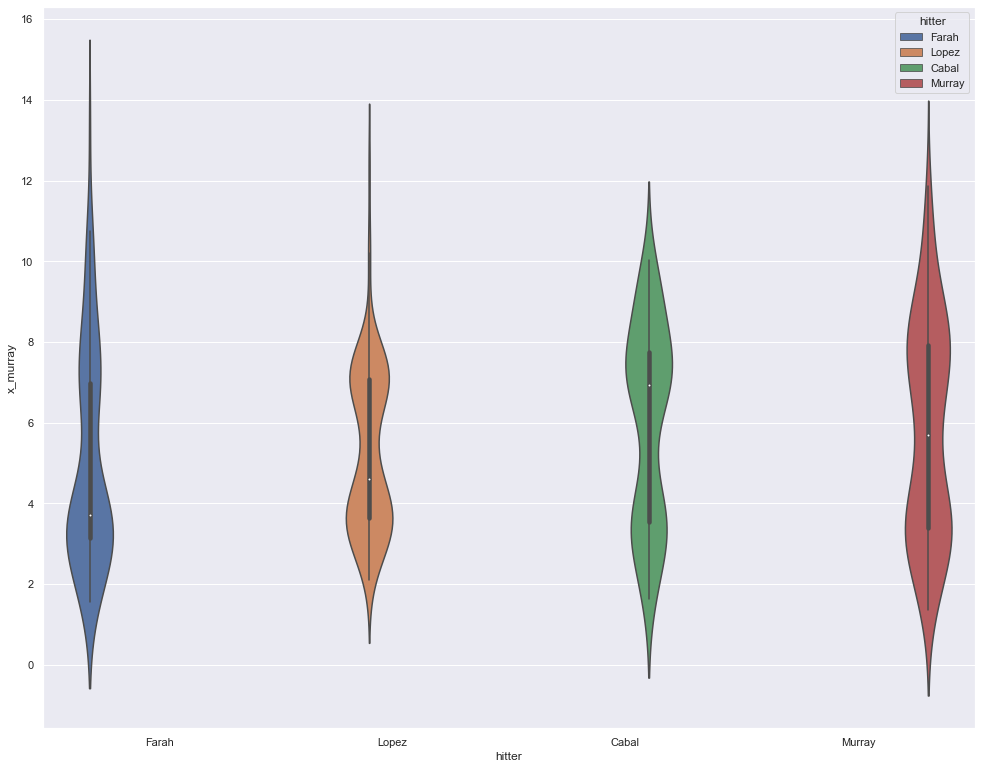

In [29]:
sns.violinplot(x="hitter",y="x_murray", hue="hitter", data=data_set);
plt.show()

In [37]:
print("hitter' : ",data_set['hitter'].unique())
print("isserve' : ",data_set['isserve'].unique())
print("type' : ",data_set['type'].unique())
print("stroke' : ",data_set['stroke'].unique())

hitter' :  ['Farah' 'Lopez' 'Cabal' 'Murray']
isserve' :  [ True False]
type' :  ['points' 'topspin' 'volley' 'lob' 'return' 'slice' 'smash']
stroke' :  ['forehand' 'backhand']


In [39]:
#import the necessary module
from sklearn import preprocessing
# create the Labelencoder object
le = preprocessing.LabelEncoder()
#convert the categorical columns into numeric
data_set['hitter'] = le.fit_transform(data_set['hitter'])
data_set['isserve'] = le.fit_transform(data_set['isserve'])
data_set['type'] = le.fit_transform(data_set['type'])
data_set['stroke'] = le.fit_transform(data_set['stroke'])
#display the initial records
data_set.head()

,Unnamed: 0,rallyid,frameid,strokeid,hitter,isserve,type,stroke,x_cabal,y_cabal,x_farah,y_farah,x_lopez,y_lopez,x_murray,y_murray,time
0,0,1,22266,1,1,1,1,1,7.18,19.16,3.76,27.19,9.29,1.56,3.62,3.86,0.00
1,1,1,22299,2,2,0,5,0,7.37,18.57,4.01,25.34,9.58,2.33,3.65,3.86,1.32
2,2,1,22330,3,0,0,6,0,7.93,16.81,4.30,22.90,9.70,3.54,3.50,3.76,2.56
3,3,1,22396,4,2,0,5,1,7.42,18.08,4.28,19.80,6.45,7.35,2.68,6.20,5.20
4,4,1,22433,5,1,0,6,1,6.63,18.83,3.16,17.96,6.25,8.82,2.96,8.36,6.68


In [80]:
cols = [col for col in data_set.columns if col not in ['type','frameid','rallyid','x_cabal','y_cabal','x_farah','y_farah','x_lopez','y_lopez','x_murray','y_murray']]
# dropping the 'frameid','rallyid', x_cabal	y_cabal	x_farah	y_farah	x_lopez	y_lopez	x_murray	y_murray columns
data = data_set[cols]
target = data_set['type']
data.head(n=2)

,Unnamed: 0,strokeid,hitter,isserve,stroke,time
0,0,1,1,1,1,0.00
1,1,2,2,0,0,1.32


In [81]:
from sklearn.model_selection import train_test_split
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.30, random_state = 10)

In [82]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
#create an object of the type GaussianNB
gnb = GaussianNB()
#train the algorithm on training data and predict using the testing data
pred = gnb.fit(data_train, target_train).predict(data_test)
#print(pred.tolist())
#print the accuracy score of the model
print("Naive-Bayes accuracy : ",accuracy_score(target_test, pred, normalize = True))

Naive-Bayes accuracy :  0.672


In [83]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
#create an object of type LinearSVC
svc_model = LinearSVC(random_state=0)
#train the algorithm on training data and predict using the testing data
pred = svc_model.fit(data_train, target_train).predict(data_test)
#print the accuracy score of the model
print("LinearSVC accuracy : ",accuracy_score(target_test, pred, normalize = True))

LinearSVC accuracy :  0.096


c:\users\afe\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [84]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
#create object of the lassifier
neigh = KNeighborsClassifier(n_neighbors=3)
#Train the algorithm
neigh.fit(data_train, target_train)
# predict the response
pred = neigh.predict(data_test)
# evaluate accuracy
print ("KNeighbors accuracy score : ",accuracy_score(target_test, pred))

KNeighbors accuracy score :  0.272
